In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 edited (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Combine January and February data for scaling
combined_data = pd.concat([january_data, february_data])

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_data)

# Split the data back into training and testing sets
train_data = scaled_data[:len(january_data)]
test_data = scaled_data[len(january_data):]


In [3]:
# Function to create sequences of data
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 60  # e.g., using past 60 time steps to predict the next step
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [4]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
111/111 [==============================] - 13s 70ms/step - loss: 0.0124 - val_loss: 0.0061
Epoch 2/20
111/111 [==============================] - 5s 47ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 3/20
111/111 [==============================] - 6s 56ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 4/20
111/111 [==============================] - 6s 50ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 5/20
111/111 [==============================] - 5s 48ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/20
111/111 [==============================] - 7s 59ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7/20
111/111 [==============================] - 7s 63ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/20
111/111 [==============================] - 7s 60ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 9/20
111/111 [==============================] - 5s 48ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 10/20
111/111 [==============================] - 10s 89ms/step - loss: 0.0018 - val_

In [5]:
# Make predictions
predicted_speed = model.predict(X_test)

# Inverse transform the predictions to get actual values
predicted_speed = scaler.inverse_transform(predicted_speed)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


125/125 [==============================] - 3s 16ms/step


Mean Squared Error: 0.4082311586122041


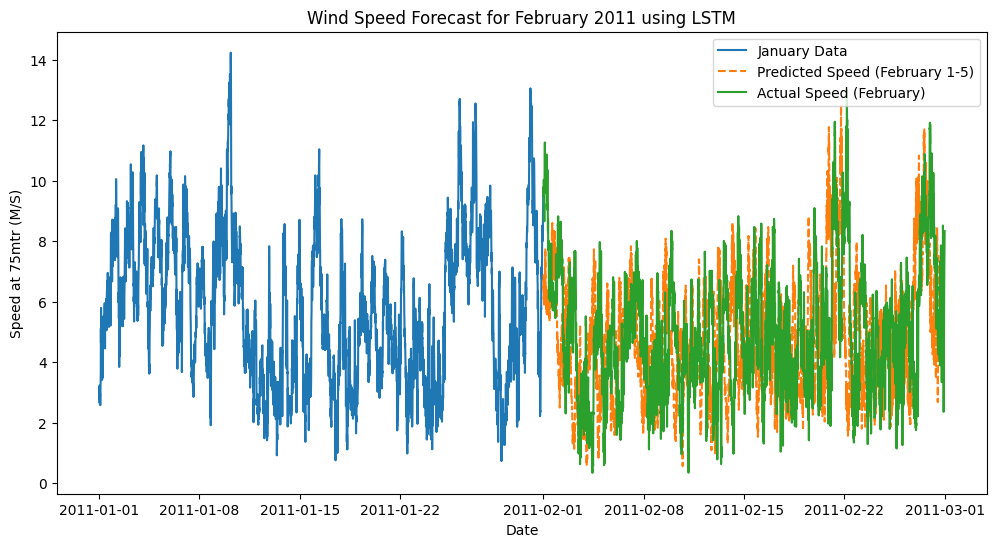

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test_actual, predicted_speed)
print('Mean Squared Error:', mse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(february_data.index[:len(predicted_speed)], predicted_speed, label='Predicted Speed (February 1-5)', linestyle='--')
plt.plot(february_data.index, february_data['Speed at 75mtr'], label='Actual Speed (February)', linestyle='-')
plt.title('Wind Speed Forecast for February 2011 using LSTM')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [1]:
!pip install tensorflow


In [9]:
import pandas as pd

# Load the CSV file
file_path = '/content/Busduct1_MFM_2024-02-07-18-59-40.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Timestamp,BUSDUCT1 Current R,BUSDUCT1 Current Y,BUSDUCT1 Current B,BUSDUCT1 VOL RY,BUSDUCT1 VOL YB,BUSDUCT1 VOL BR,BUSDUCT1 KW,BUSDUCT1 PF
0,2023-03-11 14:45:00,25.089851,23.117828,27.809412,417.192963,419.108429,419.375885,NaN,76.029658
1,2023-03-11 15:00:00,20.480844,18.777246,23.783428,415.622589,417.509216,417.893982,NaN,76.077837
2,2023-03-11 15:15:00,35.334042,32.967422,40.695690,411.941101,413.911316,413.914825,NaN,76.750880
3,2023-03-11 15:30:00,33.526539,31.230062,37.576008,408.533417,410.693115,410.623932,NaN,75.674164
4,2023-03-11 15:45:00,23.486351,21.534044,25.824032,407.508392,409.861328,409.816833,NaN,79.324406


In [ ]:
# prompt: Using dataframe data: DEVELOP A LSTM FORECASTING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('data.csv')

# Preprocess the data
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')
data = data.dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the CSV file
file_path = '/content/Busduct1_MFM_2024-02-07-18-59-40.csv'
data = pd.read_csv(file_path)

# Ensure data columns are correctly named and convert to datetime if necessary
data.columns = [col.strip() for col in data.columns]  # Strip any leading/trailing whitespace from column names

# Selecting the relevant columns
X = data[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']]

# Split the data into training and testing sets
train, test = X[0:30], X[30:]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)




In [19]:
print(f"Shape of X_test: {X_test.shape}")


Shape of X_test: (0,)


Epoch 1/20
107/107 [==============================] - 12s 74ms/step - loss: 0.0502 - val_loss: 0.0402
Epoch 2/20
107/107 [==============================] - 5s 51ms/step - loss: 0.0369 - val_loss: 0.0353
Epoch 3/20
107/107 [==============================] - 7s 63ms/step - loss: 0.0348 - val_loss: 0.0334
Epoch 4/20
107/107 [==============================] - 5s 51ms/step - loss: 0.0319 - val_loss: 0.0307
Epoch 5/20
107/107 [==============================] - 6s 56ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 6/20
107/107 [==============================] - 6s 57ms/step - loss: 0.0289 - val_loss: 0.0294
Epoch 7/20
107/107 [==============================] - 5s 50ms/step - loss: 0.0287 - val_loss: 0.0283
Epoch 8/20
107/107 [==============================] - 7s 64ms/step - loss: 0.0279 - val_loss: 0.0281
Epoch 9/20
107/107 [==============================] - 5s 50ms/step - loss: 0.0280 - val_loss: 0.0277
Epoch 10/20
107/107 [==============================] - 8s 73ms/step - loss: 0.0274 - val_l

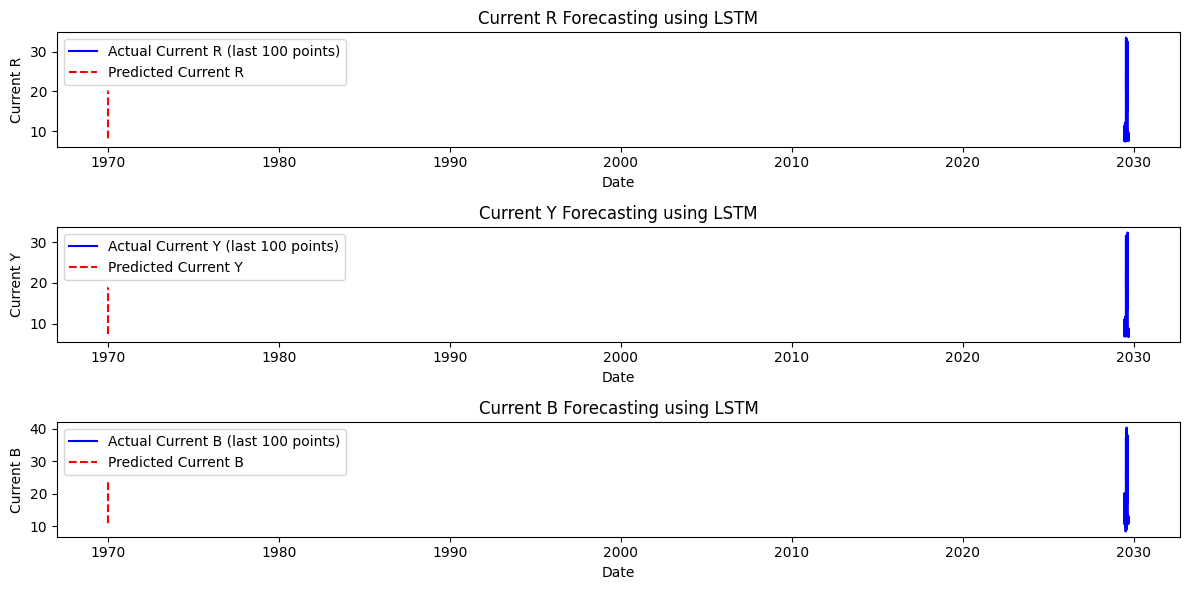

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the CSV file
file_path = '/content/Busduct1_MFM_2024-02-07-18-59-40.csv'
data = pd.read_csv(file_path)

# Ensure data columns are correctly named and convert to datetime if necessary
data.columns = [col.strip() for col in data.columns]  # Strip any leading/trailing whitespace from column names

# Selecting the relevant columns
X = data[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']]

# Use the last 30 days of data for training
train = X[-30*24*6:]  # 30 days * 24 hours * 6 (10-minute intervals per hour)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # Use the past 60 time steps to predict the next time step
X_train, y_train = create_sequences(train_scaled, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions for the next 6 days
forecast_steps = 6 * 24 * 6  # 6 days * 24 hours * 6 (10-minute intervals per hour)
input_seq = train_scaled[-seq_length:]

predictions = []
for _ in range(forecast_steps):
    input_seq = input_seq.reshape((1, seq_length, X_train.shape[2]))
    predicted = model.predict(input_seq)
    predictions.append(predicted)
    input_seq = np.append(input_seq[:, 1:, :], predicted.reshape((1, 1, X_train.shape[2])), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(forecast_steps, X_train.shape[2]))

# Create a timestamp index for the forecast period
last_timestamp = train.index[-1]
forecast_index = pd.date_range(start=last_timestamp, periods=forecast_steps + 1, freq='10T')[1:]

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=forecast_index, columns=['Predicted Current R', 'Predicted Current Y', 'Predicted Current B'])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for Current R
plt.subplot(3, 1, 1)
plt.plot(train.index[-100:], train['BUSDUCT1 Current R'].tail(100), label='Actual Current R (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current R'], label='Predicted Current R', color='red', linestyle='--')
plt.title('Current R Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current R')
plt.legend()

# Plot for Current Y
plt.subplot(3, 1, 2)
plt.plot(train.index[-100:], train['BUSDUCT1 Current Y'].tail(100), label='Actual Current Y (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current Y'], label='Predicted Current Y', color='red', linestyle='--')
plt.title('Current Y Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current Y')
plt.legend()

# Plot for Current B
plt.subplot(3, 1, 3)
plt.plot(train.index[-100:], train['BUSDUCT1 Current B'].tail(100), label='Actual Current B (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current B'], label='Predicted Current B', color='red', linestyle='--')
plt.title('Current B Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current B')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/20
436/436 [==============================] - 31s 61ms/step - loss: 0.0185 - val_loss: 0.0182
Epoch 2/20
436/436 [==============================] - 25s 58ms/step - loss: 0.0142 - val_loss: 0.0160
Epoch 3/20
436/436 [==============================] - 26s 60ms/step - loss: 0.0131 - val_loss: 0.0157
Epoch 4/20
436/436 [==============================] - 26s 60ms/step - loss: 0.0127 - val_loss: 0.0159
Epoch 5/20
436/436 [==============================] - 28s 63ms/step - loss: 0.0123 - val_loss: 0.0152
Epoch 6/20
436/436 [==============================] - 29s 66ms/step - loss: 0.0120 - val_loss: 0.0151
Epoch 7/20
436/436 [==============================] - 26s 60ms/step - loss: 0.0119 - val_loss: 0.0151
Epoch 8/20
436/436 [==============================] - 27s 61ms/step - loss: 0.0118 - val_loss: 0.0146
Epoch 9/20
436/436 [==============================] - 26s 59ms/step - loss: 0.0115 - val_loss: 0.0145
Epoch 10/20
436/436 [==============================] - 26s 61ms/step - loss: 0.011

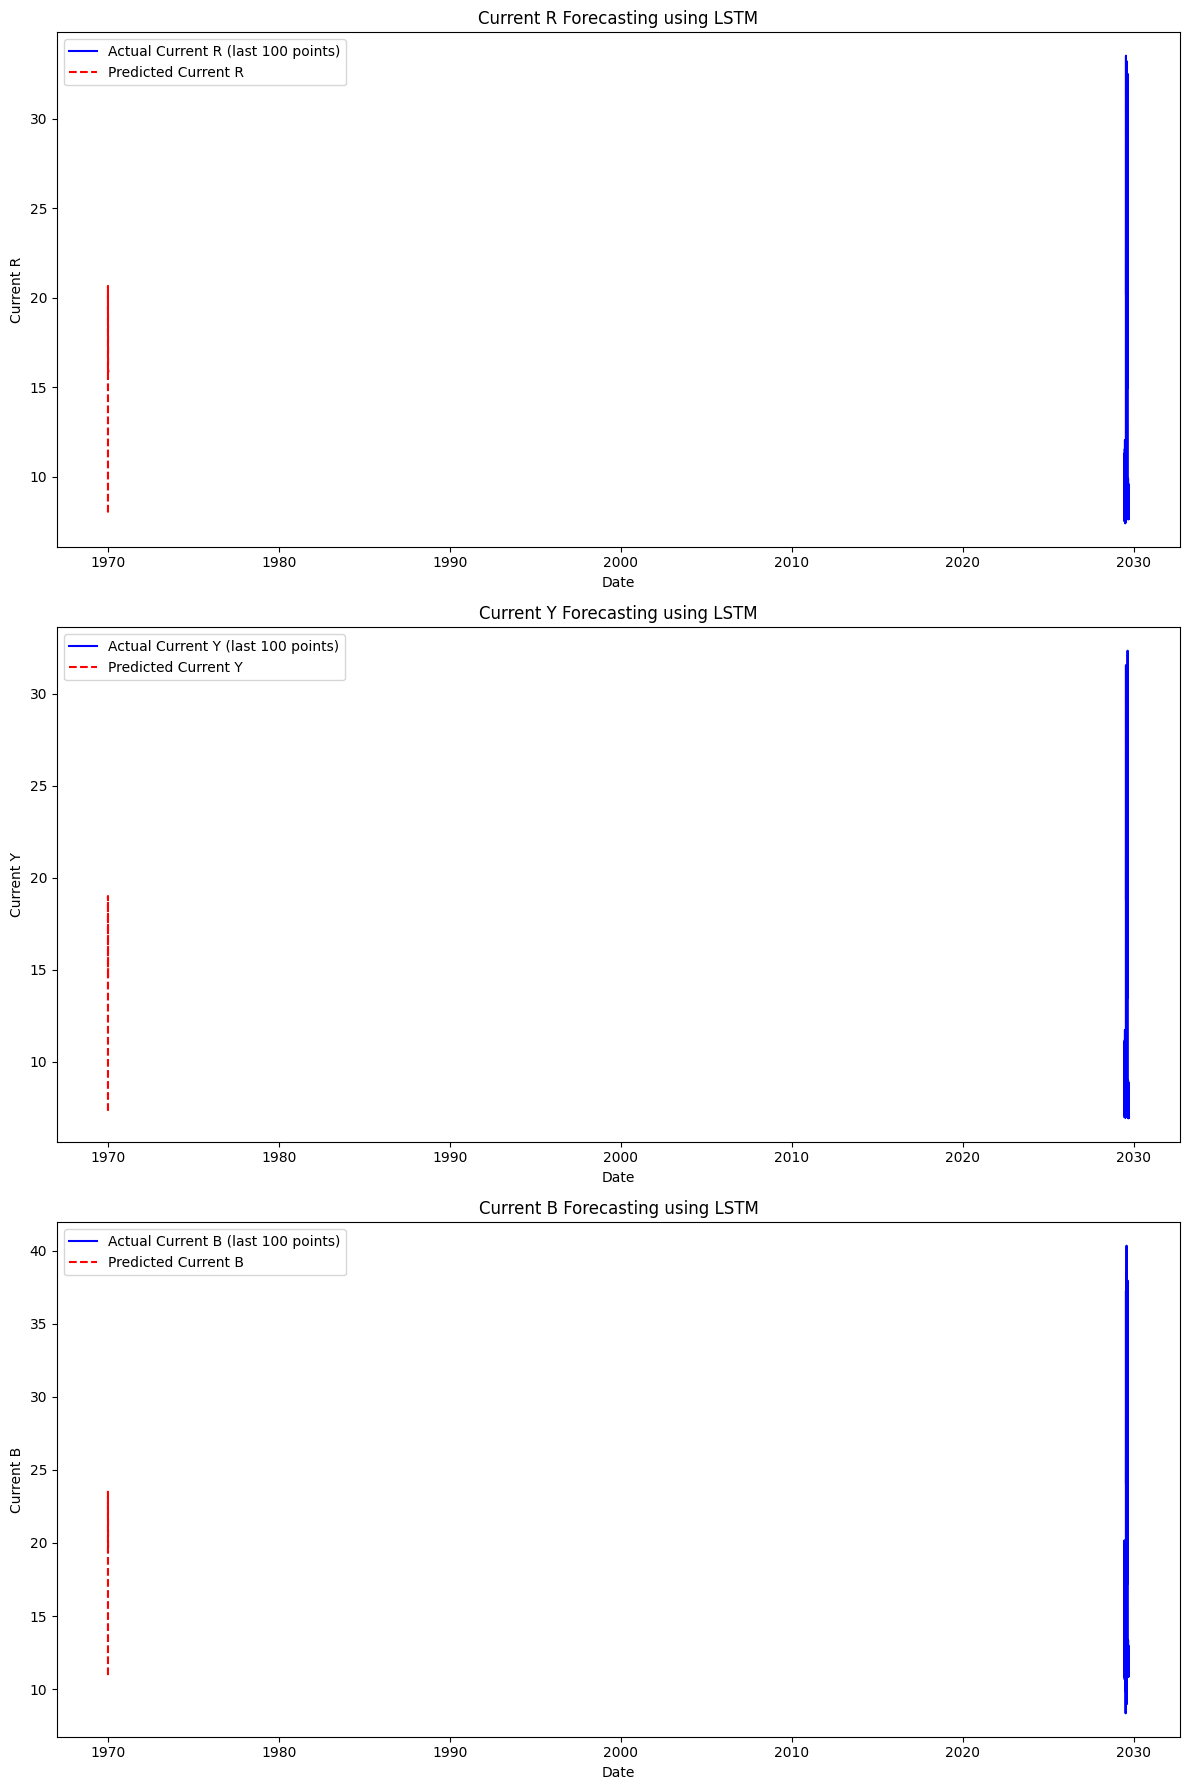

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the CSV file
file_path = '/content/Busduct1_MFM_2024-02-07-18-59-40.csv'
data = pd.read_csv(file_path)

# Ensure data columns are correctly named and convert to datetime if necessary
data.columns = [col.strip() for col in data.columns]  # Strip any leading/trailing whitespace from column names

# Selecting the relevant columns
X = data[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']]

# Use the last 30 days of data for training
train = X[30*24*6:]  # 30 days * 24 hours * 6 (10-minute intervals per hour)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # Use the past 60 time steps to predict the next time step
X_train, y_train = create_sequences(train_scaled, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions for the next 6 days
forecast_steps = 6 * 24 * 6  # 6 days * 24 hours * 6 (10-minute intervals per hour)
input_seq = train_scaled[-seq_length:]

predictions = []
for _ in range(forecast_steps):
    input_seq = input_seq.reshape((1, seq_length, X_train.shape[2]))
    predicted = model.predict(input_seq)
    predictions.append(predicted)
    input_seq = np.append(input_seq[:, 1:, :], predicted.reshape((1, 1, X_train.shape[2])), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(forecast_steps, X_train.shape[2]))

# Create a timestamp index for the forecast period
last_timestamp = train.index[-1]
forecast_index = pd.date_range(start=last_timestamp, periods=forecast_steps + 1, freq='10T')[1:]

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=forecast_index, columns=['Predicted Current R', 'Predicted Current Y', 'Predicted Current B'])

# Plot the results
plt.figure(figsize=(12, 18))

# Plot for Current R
plt.subplot(3, 1, 1)
plt.plot(train.index[-100:], train['BUSDUCT1 Current R'].tail(100), label='Actual Current R (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current R'], label='Predicted Current R', color='red', linestyle='--')
plt.title('Current R Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current R')
plt.legend()

# Plot for Current Y
plt.subplot(3, 1, 2)
plt.plot(train.index[-100:], train['BUSDUCT1 Current Y'].tail(100), label='Actual Current Y (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current Y'], label='Predicted Current Y', color='red', linestyle='--')
plt.title('Current Y Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current Y')
plt.legend()

# Plot for Current B
plt.subplot(3, 1, 3)
plt.plot(train.index[-100:], train['BUSDUCT1 Current B'].tail(100), label='Actual Current B (last 100 points)', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Current B'], label='Predicted Current B', color='red', linestyle='--')
plt.title('Current B Forecasting using LSTM')
plt.xlabel('Date')
plt.ylabel('Current B')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
print(f"Shape of X_test: {X_test.shape}")

Shape of X_test: (0,)
